In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [3]:
frame = pd.read_csv("../data/HCC_AA/filtered_gene_bc_matrices/GRCh38/ms_mapping.tab", sep="\t")
frame

,Barcode,Multiseq,nUMI
0,CGGGTCATCACTCTTA,TGCCGTGG,5
1,CGGGTCATCACTCTTA,GCCAGTTA,46
2,CGGGTCATCACTCTTA,CACTGTAG,3
3,TGGGCGTAGACTGGGT,GCCAGTTA,1
4,TGGGCGTAGACTGGGT,TGCCGTGG,1
...,...,...,...
13586,TGAGGGACAGTACACT,CACTGTAG,5
13587,CCTACACCACAGTCGC,CACTGTAG,2
13588,CCTACACCACAGTCGC,TGCCGTGG,153
13589,AGGGAGTCAGGTGGAT,CACTGTAG,1


In [5]:
agg_frame = frame.\
    groupby("Barcode").\
    agg({"nUMI" : "sum", "Multiseq" : "size"}).\
    reset_index()

In [1]:

ratio_frame = []

for idx, subframe in tqdm(frame.groupby("cell_barcode")):
    if subframe.shape[0] < 2:
        continue
    sf = subframe.sort_values("n_umi", ascending=False)
    
    maj_b, min_b = sf.multiseq_barcode[:2]
    maj_u, min_u = sf.n_umi[:2]
    ratio = maj_u / min_u
    total = sf.n_umi.sum()
    
    values = (idx, maj_b, min_b, maj_u, min_u, ratio, total)
    ratio_frame.append(values)
    

ratio_frame = pd.DataFrame(ratio_frame, columns = ['cb', 'maj_b', "min_b", "maj_u", "min_u", "ratio", "total"])
ratio_frame

NameError: name 'tqdm' is not defined

In [39]:
ratio_frame['log_ratio'] = np.log2(ratio_frame.ratio)
ratio_frame['maj_f'] = ratio_frame.maj_u / ratio_frame.total

<AxesSubplot:xlabel='total', ylabel='log_ratio'>

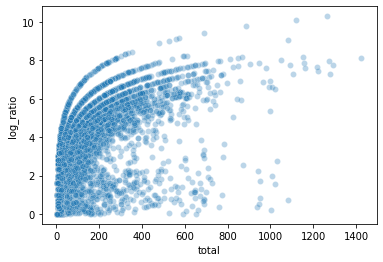

In [40]:
sns.scatterplot(data = ratio_frame, x = "total", y = "log_ratio", alpha = 0.3)

<AxesSubplot:xlabel='maj_f', ylabel='log_ratio'>

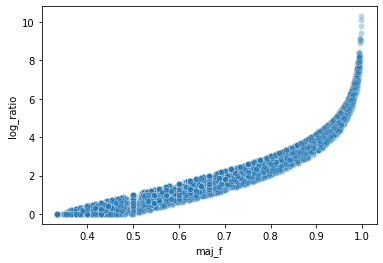

In [49]:
sns.scatterplot(data = ratio_frame, x = "maj_f", y = "log_ratio", alpha = 0.3)

In [45]:
# ratio_frame[ratio_frame.log_ratio]
ratio_frame.maj_b.unique()

array(['CACTGTAG', 'TGCCGTGG', 'GCCAGTTA'], dtype=object)

<AxesSubplot:xlabel='maj_u', ylabel='Count'>

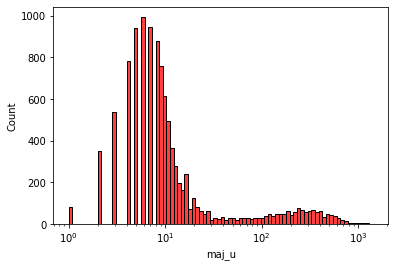

In [50]:
sns.histplot(
    data = ratio_frame[ratio_frame.maj_b == "CACTGTAG"], 
    x = "maj_u", log_scale=True, color="red"
)
# sns.histplot(
#     data = ratio_frame[ratio_frame.maj_b == "TGCCGTGG"], 
#     x = "maj_u", log_scale=True, color = "orange"
# )
# sns.histplot(
#     data = ratio_frame[ratio_frame.maj_b == "GCCAGTTA"], 
#     x = "maj_u", log_scale=True, color = "yellow"
# )